In [1]:
import path_planning as pp
import matplotlib.pyplot as plt
import numpy as np
import search_algorithm as sa

(-0.5, 29.5, 49.5, -0.5)

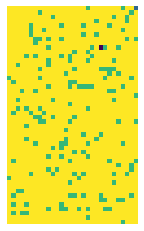

In [2]:
"""
create maps with obstacles randomly distributed
cells with a value of 0: Free cell; 
                     -1: Obstacle;
                     -2: Start point;
                     -3: Goal point;
"""

# create a map with obstacles randomly distributed
map_2d = pp.generateMap2d([30,50])
#with np.printoptions(threshold=np.inf):
#    print(map_2d)
plt.clf()
plt.imshow(map_2d)
plt.axis('off')

In [3]:
# create a map with rotated H shape obstacle and obstacles randomly distributed
map_h_object, info = pp.generateMap2d_obstacle([60,60])
print(f"y_top {info[0]} | y_bottom {info[1]} | x_wall {info[2]} ")
#with np.printoptions(threshold=np.inf):
#    print(map_h_object)
#plt.clf()
#plt.imshow(map_h_object)
#plt.axis('off')

y_top 48 | y_bottom 8 | x_wall 31 


In [4]:
map_2d_arr = np.array(map_2d)
locObstacle = np.where(map_2d_arr == -1)
locStart, locEnd = np.where(map_2d_arr == -2), np.where(map_2d_arr == -3)
#print('Obstacle:',locObstacle)
print('Start:',locStart)
print('Start:',locStart[0][0])
print('Start:',locStart[1][0])
print('Goal:',locEnd)
print('Goal:',locEnd[0][0])
print('Goal:',locEnd[1][0])
start = (locStart[0][0], locStart[1][0])  # (0, 0)
end = (locEnd[0][0], locEnd[1][0])  # (7, 6)
map_2d_Temp=map_2d
#map_2d=np.where(map_2d==-2, 0, map_2d)
#map_2d=np.where(map_2d==-3, 0, map_2d)
start_ = np.where(map_2d==-2)
print(start_)
map_2d[start_] =0
end_ = np.where(map_2d==-3)
map_2d[end_] =0

Start: (array([0], dtype=int64), array([29], dtype=int64))
Start: 0
Start: 29
Goal: (array([9], dtype=int64), array([21], dtype=int64))
Goal: 9
Goal: 21
(array([0], dtype=int64), array([29], dtype=int64))


Length of Explored Nodes BFS:  158

ShortestPath: [(0, 29), (0, 28), (0, 27), (1, 27), (1, 26), (1, 25), (1, 24), (1, 23), (1, 22), (1, 21), (2, 21), (3, 21), (4, 21), (5, 21), (6, 21), (7, 21), (8, 21), (9, 21)]


<Figure size 432x288 with 0 Axes>

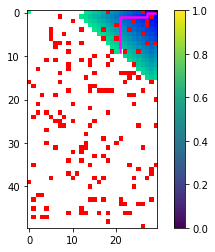

In [5]:
################# BFS ####################################################################
ShortestPath,Cost, map_Temp=sa.search(map_2d,start,end,info,'BFS')
print('\nShortestPath:',ShortestPath)
map_Temp[end_]=-3
map_Temp[start_]=-2
# set value of f(n), i.e. evaluation function (or cost g(n), heuristic h(n)), for (opened) cell n
example_solved_map = map_Temp #map_h_object
example_solved_map[0, 0] = 20
example_solved_path = np.array(ShortestPath)#np.array([range(30)]).reshape(15, 2)
plt.clf()
pp.plotMap(example_solved_map, example_solved_path)
##########################################################################################

Length of Explored Nodes DFS:  179

ShortestPath: [(0, 29), (0, 28), (0, 27), (1, 27), (1, 26), (1, 25), (1, 24), (1, 23), (1, 22), (1, 21), (1, 20), (1, 19), (1, 18), (1, 17), (1, 16), (1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (1, 8), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (9, 5), (9, 6), (9, 7), (9, 8), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (8, 18), (8, 19), (8, 20), (8, 21), (9, 21)]


<Figure size 432x288 with 0 Axes>

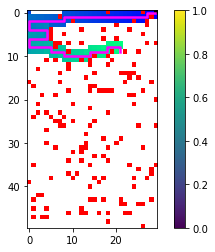

In [6]:
################# DFS ####################################################################
ShortestPath,Cost, map_Temp=sa.search(map_2d,start,end,info,'DFS')
print('\nShortestPath:',ShortestPath)
map_Temp[end_]=-3
map_Temp[start_]=-2
# set value of f(n), i.e. evaluation function (or cost g(n), heuristic h(n)), for (opened) cell n
example_solved_map = map_Temp #map_h_object
example_solved_map[0, 0] = 20
example_solved_path = np.array(ShortestPath)#np.array([range(30)]).reshape(15, 2)
plt.clf()
pp.plotMap(example_solved_map, example_solved_path)


##########################################################################################

Length of Explored Nodes Greedy:  42

ShortestPath: [(0, 29), (1, 29), (2, 29), (3, 29), (4, 29), (5, 29), (6, 29), (6, 28), (7, 28), (8, 28), (9, 28), (9, 27), (9, 26), (8, 26), (8, 25), (8, 24), (8, 23), (8, 22), (8, 21), (9, 21)]


<Figure size 432x288 with 0 Axes>

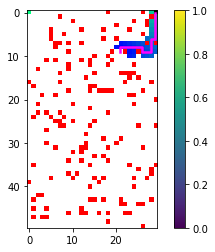

In [7]:
################# Greedy ####################################################################
ShortestPath,Cost, map_Temp=sa.search(map_2d,start,end,info,'Greedy')
print('\nShortestPath:',ShortestPath)
map_Temp[end_]=-3
map_Temp[start_]=-2
# set value of f(n), i.e. evaluation function (or cost g(n), heuristic h(n)), for (opened) cell n
example_solved_map = map_Temp #map_h_object
example_solved_map[0, 0] = 20
example_solved_path = np.array(ShortestPath)#np.array([range(30)]).reshape(15, 2)
plt.clf()
pp.plotMap(example_solved_map, example_solved_path)


##########################################################################################

Length of Explored Nodes aStarE:  34

ShortestPath: [(0, 29), (1, 29), (2, 29), (2, 28), (3, 28), (4, 28), (4, 27), (4, 26), (4, 25), (5, 25), (6, 25), (6, 24), (7, 24), (7, 23), (8, 23), (8, 22), (8, 21), (9, 21)]


<Figure size 432x288 with 0 Axes>

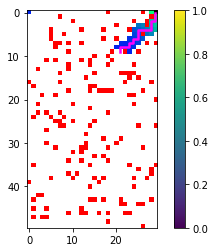

In [8]:
################## AStarE ########################################################
ShortestPath,Cost, map_Temp = sa.search(map_2d,start,end,info,'aStarE')
print('\nShortestPath:',ShortestPath)
#print(map_Temp)
#print('Cost:',Cost)
map_Temp[end_]=-3
map_Temp[start_]=-2
example_solved_map = map_Temp #map_h_object
example_solved_map[0, 0] = 20
example_solved_path = np.array(ShortestPath)#np.array([range(30)]).reshape(15, 2)
plt.clf()
pp.plotMap(example_solved_map, example_solved_path)

#map_2d= map_2d_Temp

#map_2d_Temp[end_]=-3
#map_2d_Temp[start_]=-2
#######################################

Length of Explored Nodes aStarM:  89

ShortestPath: [(0, 29), (1, 29), (2, 29), (3, 29), (4, 29), (5, 29), (6, 29), (6, 28), (7, 28), (8, 28), (8, 27), (8, 26), (8, 25), (8, 24), (8, 23), (8, 22), (8, 21), (9, 21)]


<Figure size 432x288 with 0 Axes>

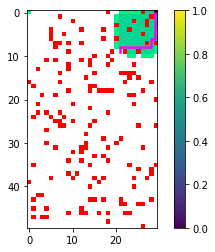

In [9]:
################## AStarM ########################################################
ShortestPath,Cost, map_Temp = sa.search(map_2d,start,end,info,'aStarM')
print('\nShortestPath:',ShortestPath)
#print(map_Temp)
#print('Cost:',Cost)
map_Temp[end_]=-3
map_Temp[start_]=-2
example_solved_map = map_Temp #map_h_object
example_solved_map[0, 0] = 20
example_solved_path = np.array(ShortestPath)#np.array([range(30)]).reshape(15, 2)
plt.clf()
pp.plotMap(example_solved_map, example_solved_path)
#################################################################

2
Random search found DFS
Length of Explored Nodes DFS:  179

ShortestPath: [(0, 29), (0, 28), (0, 27), (1, 27), (1, 26), (1, 25), (1, 24), (1, 23), (1, 22), (1, 21), (1, 20), (1, 19), (1, 18), (1, 17), (1, 16), (1, 15), (1, 14), (1, 13), (1, 12), (1, 11), (1, 10), (1, 9), (1, 8), (2, 8), (2, 7), (2, 6), (2, 5), (2, 4), (2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (5, 4), (6, 4), (6, 3), (6, 2), (6, 1), (6, 0), (7, 0), (8, 0), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (9, 5), (9, 6), (9, 7), (9, 8), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (9, 14), (9, 15), (9, 16), (9, 17), (9, 18), (8, 18), (8, 19), (8, 20), (8, 21), (9, 21)]


<Figure size 432x288 with 0 Axes>

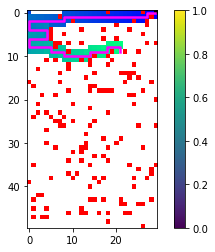

In [10]:
################## Random Search ########################################################
ShortestPath,Cost, map_Temp = sa.search(map_2d,start,end,info,'Random')
print('\nShortestPath:',ShortestPath)
#print(map_Temp)
#print('Cost:',Cost)
map_Temp[end_]=-3
map_Temp[start_]=-2
example_solved_map = map_Temp #map_h_object
example_solved_map[0, 0] = 20
example_solved_path = np.array(ShortestPath)#np.array([range(30)]).reshape(15, 2)
plt.clf()
pp.plotMap(example_solved_map, example_solved_path)
#################################################################